# 多元线性回归

In [204]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 1. 生成数据集

In [205]:
def make_data(w:np.ndarray, b:float):
    """
    :params w: 权重
    :params b: 偏置
    """
    num = len(w)
    x = np.random.random(size=100**num).reshape(-1, num)
    y = np.dot(x, w) + b
    y += np.random.normal() * 0.1

    return x, y

### 设置拟定生成数据参数

In [206]:
true_w = np.array([1.2, 1.0])
true_b = -3.2

In [207]:
x, y = make_data(true_w, true_b)
x.shape, y.shape

((5000, 2), (5000,))

### 特征量的分布

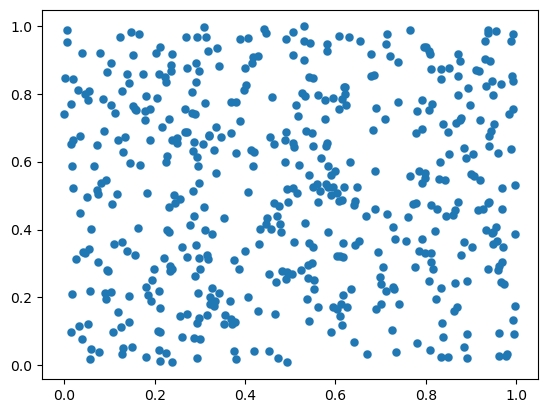

In [208]:
plt.scatter(*x.T[:, ::10], linewidths=0.1)
plt.show()

### 数据的空间分布

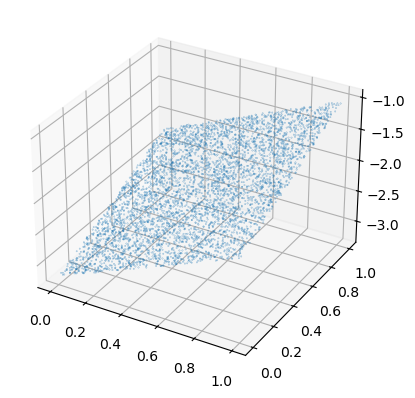

In [209]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制散点图
scatter = ax.scatter(x.T[0], x.T[1], y,  alpha=0.7, s=0.05)
plt.show()

## 2. 手动实现梯度下降

In [236]:
epochs = 1000    # 迭代次数
alpha = 0.01    # 学习率

In [237]:
w, b = np.array([0.3, 0.3]), -1.0    # 初始化 w b

In [238]:
loss_lst = []
for i in range(epochs):
    # 推理预测
    y_hat = np.dot(x, w) + b
    # 计算代价函数
    J = ((y - y_hat)**2).mean() / 2
    # 计算J关于W的偏导
    Jw = - x.T@(y - y_hat) / len(y)
    Jb = - (y - y_hat).mean()
    # 梯度下降
    w -= alpha * Jw
    b -= alpha * Jb
    # 打印loss
    print(f"epochs {i+1}, loss = {J}, w={w}, b={b}")
    loss_lst.append(J)
    

epochs 1, loss = 1.0046851027834713, w=[0.29380228 0.29378155], b=-1.013782828700737
epochs 2, loss = 0.9781832850582867, w=[0.28771074 0.28766695], b=-1.0273658277049302
epochs 3, loss = 0.9524807431852017, w=[0.28172375 0.28165463], b=-1.0407520443114133
epochs 4, loss = 0.9275532440330386, w=[0.27583969 0.27574302], b=-1.0539444792620005
epochs 5, loss = 0.9033772893337727, w=[0.27005701 0.26993057], b=-1.0669460874528387
epochs 6, loss = 0.8799300933978466, w=[0.26437412 0.26421576], b=-1.079759778634891
epochs 7, loss = 0.8571895615052686, w=[0.25878952 0.25859709], b=-1.0923884181037171
epochs 8, loss = 0.8351342689519974, w=[0.25330168 0.2530731 ], b=-1.1048348273787159
epochs 9, loss = 0.8137434407317466, w=[0.24790912 0.24764233], b=-1.1171017848719866
epochs 10, loss = 0.7929969318339365, w=[0.24261039 0.24230335], b=-1.1291920265469737
epochs 11, loss = 0.7728752081391093, w=[0.23740403 0.23705475], b=-1.141108246567046
epochs 12, loss = 0.7533593278936904, w=[0.23228864 0.2

In [239]:
w, b

(array([0.43509631, 0.32319657]), -2.4158917314794284)

### 梯度下降曲线

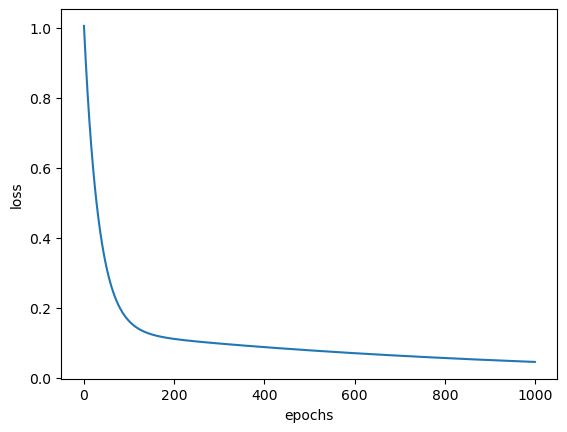

In [240]:
plt.plot(list(range(len(loss_lst))), loss_lst)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

## 3. 动手实现随机梯度下降

In [241]:
epochs = 10    # 迭代次数
alpha = 0.1    # 学习率
batch_size = 10     # 批量大小

In [242]:
w, b = np.array([0.3, 0.3]), -1.0    # 初始化 w b

In [243]:
loss_lst = []
for i in range(epochs):
    size = len(y)
    for j in range(np.random.randint(batch_size), size, batch_size):
        start_index, end_index = j, min(j+batch_size, size)
        _x, _y = x[start_index:end_index, :], y[start_index:end_index]
        # print(_x.shape, _y.shape)
        # 推理预测
        y_hat = np.dot(_x, w) + b
        # 计算代价函数
        J = ((_y - y_hat)**2).mean() / 2
        # 计算J关于W的偏导
        Jw = - _x.T@(_y - y_hat) / len(_y)
        Jb = - (_y - y_hat).mean()
        # 梯度下降
        w -= alpha * Jw
        b -= alpha * Jb
    # 打印loss
    y_hat = np.dot(x, w) + b
    J = ((y - y_hat)**2).mean() / 2
    print(f"epochs {i+1}, loss = {J}, w={w}, b={b}")
    loss_lst.append(J)

epochs 1, loss = 0.0005354901888109011, w=[1.1200747  0.92055565], b=-3.0978584955396515
epochs 2, loss = 2.0922851180021573e-06, w=[1.19513725 0.99497964], b=-3.1732056826162163
epochs 3, loss = 8.307487993394825e-09, w=[1.19969483 0.99968232], b=-3.1780763834892882
epochs 4, loss = 3.290763047858891e-11, w=[1.19998082 0.99997996], b=-3.1783831829677736
epochs 5, loss = 1.3033416865770352e-13, w=[1.19999879 0.99999874], b=-3.1784024649205063
epochs 6, loss = 5.173740880592568e-16, w=[1.19999992 0.99999992], b=-3.1784036781924083
epochs 7, loss = 2.0493643674253667e-18, w=[1.2        0.99999999], b=-3.178403754754946
epochs 8, loss = 8.132603515092345e-21, w=[1.2 1. ], b=-3.178403759568776
epochs 9, loss = 3.2155507905224616e-23, w=[1.2 1. ], b=-3.178403759869635
epochs 10, loss = 1.2798788799520302e-25, w=[1.2 1. ], b=-3.1784037598887114


In [244]:
w, b

(array([1.2, 1. ]), -3.1784037598887114)

### 梯度下降曲线

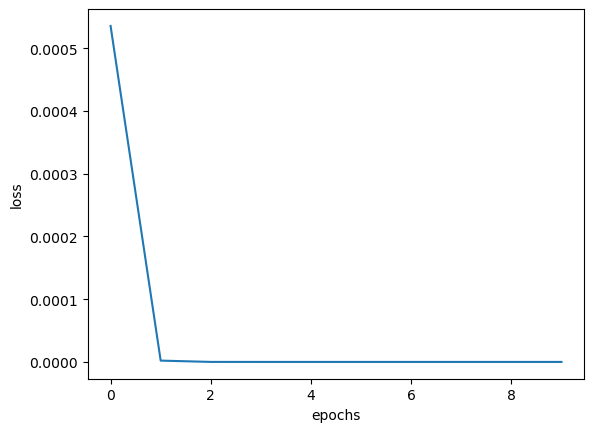

In [245]:
# loss_lst = loss_lst[:10]
plt.plot(list(range(len(loss_lst))), loss_lst)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()